# Introdução
#### Para entendermos os passos a serem seguidos diante de um problema de classificação por regressão, devemos antes sabermos como funciona o algorítmo do KNN (K-Nearest Neighbor), uma tradução mais aproximada para o português seria: K - Vizinho mais Próximo.
### Explicando como esse algoritmo funciona
#### Dado um conjunto de dados, é possivel estabelecer padrões de cada classe, com isso, podemos então verificar por uma distância euclidiana se um elemento $*$ é mais $O$ do que $X$, ou vice-versa, e assim podemos agrupar esses elementos nessas categorias. Em geral, esse algoritmo é bastante semelhante a outros algorítmos de clustering, como é o caso do K-Means, que também segrega em um grupo de K instâncias os elementos da base de dados. A principal diferença para os dois é o método para classificar os grupos e sua utilização, visto que o K-means é um aprendizado de máquina *não supervisionado* e o KNN é um aprendizado de máquina *supervisionado*

#### Vamos começar importando algumas bibliotecas e pacotes conhecidos dessas bibliotecas

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('car_.data')    #Lendo o arquivo.data

In [5]:
data.dropna(how = 'all')          #Comando dropna, muito utilizado quando se quer remover atributos faltantes

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data.head()                        #Exibindo dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Uma parte importando quando se quer segregar seus atributos em classes é transformar essas classes que são de tipo string para classes do tipo inteiro, esse processo se chama: encodar, então iremos encodar a coluna class, que será nossa coluna Y (output)

In [6]:
data_by = data["class"]              #Definindo variável que irá receber a coluna "Class"
data_by.head(10)

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
5    unacc
6    unacc
7    unacc
8    unacc
9    unacc
Name: class, dtype: object

In [10]:
#Dividindo a classe em duas partes, em uma coluna encodada e outra categorizada (o tipo padrão)
data_by_encoded, data_categories = data_by.factorize()
data_by_encoded   #Exibindo a coluna encodada

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [11]:
data_categories     #exibindo a coluna categorica

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [12]:
data.info()   #É importante verificar o tipo de sua base de dados, vemos aqui que todos os atributos sao objetos
              #Isso é algo ruim quando se quer ter um histograma ou análise gráfica de seu dataset.
              #Entretanto, essa não é a proposta deste notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Agora, vamos encodar varias colunas ao mesmo tempo, é um processo muito interessante e útil para nosso modelo do KNN

In [14]:
X = data[['buying', 'maint','safety']].values
X

array([['vhigh', 'vhigh', 'low'],
       ['vhigh', 'vhigh', 'med'],
       ['vhigh', 'vhigh', 'high'],
       ...,
       ['low', 'low', 'low'],
       ['low', 'low', 'med'],
       ['low', 'low', 'high']], dtype=object)

In [18]:
#Convertendo as colunas para dados em números com a função LabelEncoder() da scikit
#Coluna X
Le = LabelEncoder()
for i in range (len(X[0])):
  X[:,i] = Le.fit_transform(X[:,i])


print(X)


[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


#### Agora, finalmente poderemos aplicar nossos atributos a um classificador KNN. para isso iremos importar a KNN e logo em seguida dividir nossa base de dados em partes de teste e treino, respectivamente para valores de X (atributos) e para Y (saída). Caso esteja um pouco perdido nessa parte, recomendo o Notebook sobre Linear Regression, postado anteriomente: 
https://github.com/IuryChagas25/Machine-Learning-Prediction-Heart-Attacks

In [19]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X,data_by_encoded, test_size = 0.2) #data_by_encoded é o nosso Y

knn.fit(X_train,y_train)           #knn.fit atribui a regressão ao conjunto de dados de treinamento X e Y

prediction = knn.predict(X_test)   #knn.predict chama uma coluna X_test (20% da nossa base de dados de X) para testar

accuracy = metrics.accuracy_score(y_test,prediction)   #Baseando-se na saída real (y_test) é comparado com a previsão
                                                       #daí é produzido uma acurácia

print('Predictions: \n',prediction)  #Exibindo a previsão de saída de todo o conjunto de dados
print('Accuracy: \n',accuracy)       #Exibindo a acurácia obtida



Predictions: 
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 3 0
 1 1 0 0 0 0 0 2 1 1 2 0 0 0 1 0 0 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 2 0 0 0 0 1 1 2 1 0 3 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 3 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 3 0 0 0 0 3 0 2 0 0 0 0
 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 3 0 0 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 2 3]
Accuracy: 
 0.7109826589595376


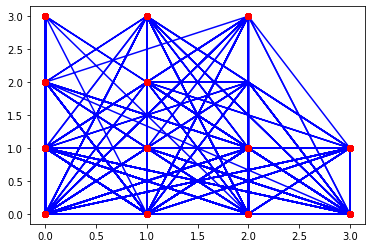

In [20]:
#Representação de um algoritmo de regressão pela KNN, note que os pontos de previsão confluem em varios pontos
#Sendo assim, consegue ser preciso em suas estimativas obtendo um restultado interessante de 71% de acurácia
plt.plot(X_test,y_test,'blue')         
plt.plot(X_test,prediction,'ro')

#### Por fim, vamos chamar um índice do nosso dataset e comparar seu valor real com a previsão pelo KNN

In [21]:
aux = 2
print('Actual Value: ',data_by_encoded[aux])
print('Prediction Value: ',knn.predict(X)[aux])

Actual Value:  0
Prediction Value:  0


# Conclusão 
#### Por fim, o objetivo de esclarescer e mostrar as etapas de pre processamento de dados para a utilização do KNN foi alcançado, neste notebook você aprendeu a converter colunas que não estavam prontas para serem inseridos em algoritmos de Machine Learning e aplicar isso em um algoritmo de classificação por regressão, o KNN, um algorítmo que nos traz um resultado consideravel em suas previsões, já podemos dizer assim que a única maneira mais confiável do que essa classificação, seria a classificação por redes neurais. Sendo assim, espero que tenha sido esclarescedor e que você possa dar inicio, com usa própria base de dados, um estudo de previsões por classificação.


*Notebook feito por: Iury Chagas da Silva Caetano*